<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning-Specialization---Andrew-Ng/blob/main/MLP_tensorflow_iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Multi Layer Perceptron with TensorFlow - Iris flower Classififcation**

---

![iris](https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg)

### **Context**

In this study, we will construct a Multi-Layer Perceptron (MLP) model using TensorFlow/Keras to classify iris flowers based on their physical features.


This MLP is a type of neural network with an architecture consisting of input, hidden, and output layers of interconnected neurons. This network is capable of learning complex patterns and performing tasks such as classification and regression by adjusting its parameters through training.

### **About dataset**

**Dataset Characteristics:**

Total samples: 150

Number of features: 4

Number of classes: 3

Type: Supervised multi-class classification

Features:

* Sepal length (cm)

* Sepal width (cm)

* Petal length (cm)

* Petal width (cm)

Target Classes:

* 0 → Setosa

* 1 → Versicolor

* 2 → Virginica

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

# style
plt.style.use('ggplot')


**Loading dataset**

In [2]:
# Loading iris dataset
uci_datasets = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(uci_datasets, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# data dimension
df.shape

(150, 5)

In [4]:
# Rename columns
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Defining features and target**

In [5]:
# Features and targets
X = df.drop('class', axis=1)
y = df['class']

In [6]:
# Replacing values using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y1 = le.fit_transform(y)
y = pd.get_dummies(y1).values

In [7]:
# Check y
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

**Data splitting**

We use 80% of data as training set and 20% of data as testing set.

In [8]:
# Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Check shape
print('Data Training: ')
print(X_train.shape)
print(y_train.shape)
print('Data Testing: ')
print(X_test.shape)
print(y_test.shape)

Data Training: 
(120, 4)
(120, 3)
Data Testing: 
(30, 4)
(30, 3)


**Model building**

We will build the MLP model with input layer, 2 hidden layers, and output layer.

In [10]:
# MLP model

modelMLP = tf.keras.Sequential()

# Input layer --> input size 4 because of 4 features
modelMLP.add(tf.keras.layers.Input(shape=(4,)))

# Hidden layer 1: neuron = 4
modelMLP.add(tf.keras.layers.Dense(4, activation='relu'))

# Hidden layer 2: neuron = 4
modelMLP.add(tf.keras.layers.Dense(4, activation='relu'))

# Output layer: neuron = 3 due to 3 labels
modelMLP.add(tf.keras.layers.Dense(3, activation='softmax'))

**Compiling model**

In [11]:
# compiling
# Use Adam as optimizer, learning rate 0.01
# Minimize loss categorical crossentropy
modelMLP.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
modelMLP.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

So, we will build MLP and train 55 parameters.

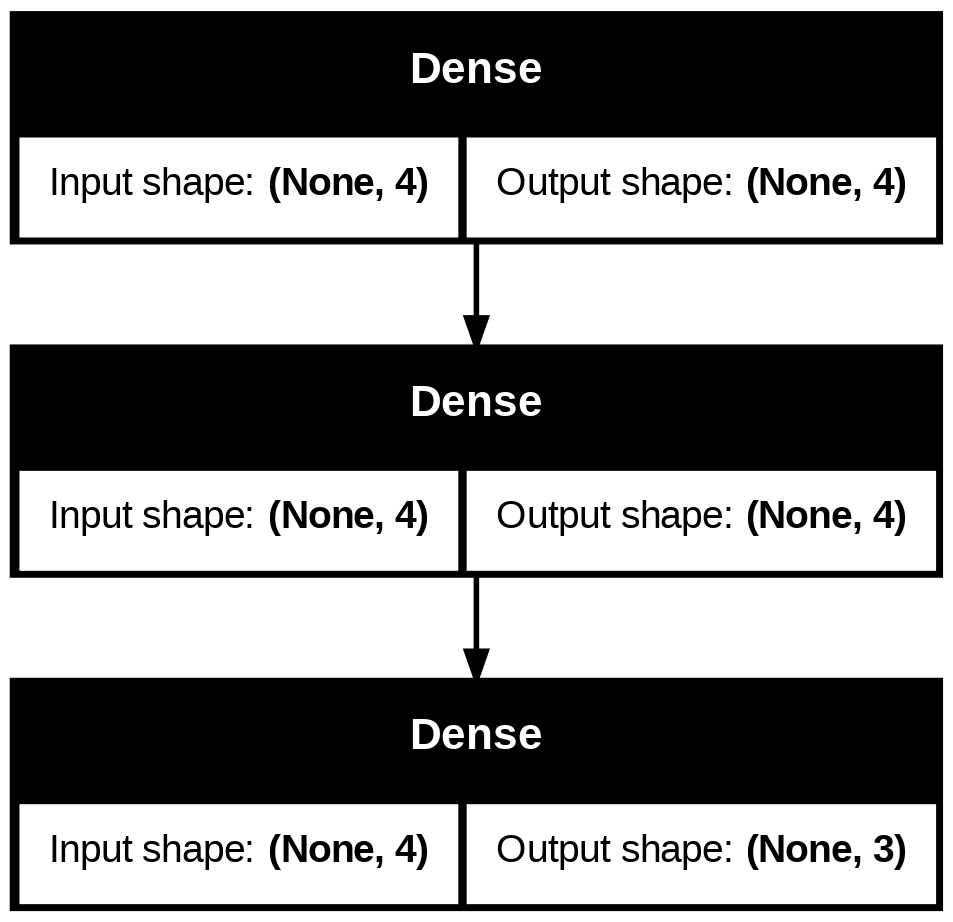

In [12]:
# Saving model architecture/workflow
plot_model(modelMLP, 'model.png', show_shapes=True)

**Model training**

We will train the model for 100 epochs and use 20% of data for data validation. We can use batch_size=16, means that the training data (X_train and y_train) will be divided into batches of 16 samples, and the model's weights will be updated after processing each batch.

In [13]:
# Training
historyMLP = modelMLP.fit(X_train, y_train, epochs=100, validation_split=0.2)
# Epoch --> number of training
# Validation_split = 0.2 --> 20% of data can be used for data validation
# batch_size=16 --> training data (X_train and y_train) divided into batches of 16 samples

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.3542 - loss: 0.9658 - val_accuracy: 0.6250 - val_loss: 0.9074
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5117 - loss: 0.9206 - val_accuracy: 0.3333 - val_loss: 0.9097
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3919 - loss: 0.8855 - val_accuracy: 0.4167 - val_loss: 0.8921
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6589 - loss: 0.8416 - val_accuracy: 0.5417 - val_loss: 0.8706
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7161 - loss: 0.7940 - val_accuracy: 0.5417 - val_loss: 0.8396
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7292 - loss: 0.7407 - val_accuracy: 0.5833 - val_loss: 0.7838
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7292 - loss: 0.6737 - val_accuracy: 0.7500 - val_loss: 0.6993
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8424 - loss: 0.6320 - val_accuracy: 0.8333 - val_loss

**Model Accuracy**

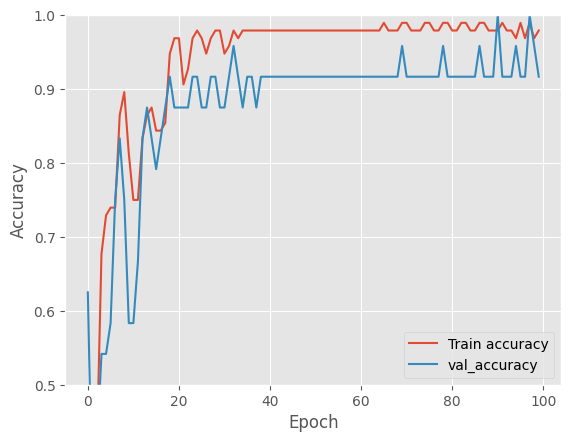

In [14]:
# Plotting Accuracy
plt.plot(historyMLP.history['accuracy'], label='Train accuracy')
plt.plot(historyMLP.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

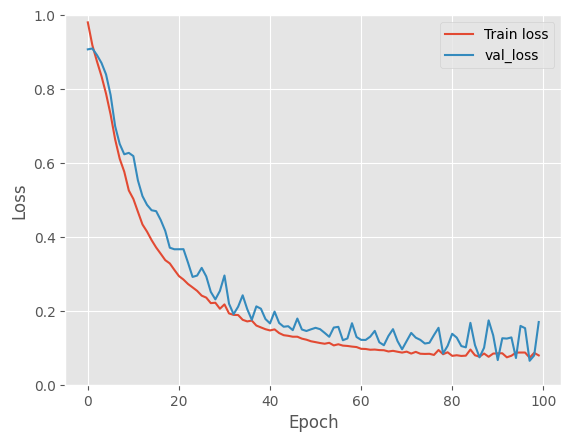

In [15]:
# Plotting loss
plt.plot(historyMLP.history['loss'], label='Train loss')
plt.plot(historyMLP.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

**Predicting to test set**

In [16]:
# Predict
y_pred_MLP = modelMLP.predict(X_test)
y_pred_MLP

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[3.0121718e-09, 2.0148347e-03, 9.9798506e-01],
       [7.4300903e-04, 9.9370527e-01, 5.5517401e-03],
       [9.9873048e-01, 1.2695374e-03, 9.1372925e-15],
       [2.0573554e-10, 1.3166443e-03, 9.9868333e-01],
       [9.9770665e-01, 2.2932857e-03, 1.6530438e-13],
       [2.3803715e-10, 8.9047401e-04, 9.9910951e-01],
       [9.9782389e-01, 2.1761120e-03, 1.2785423e-13],
       [1.4012204e-04, 9.6362078e-01, 3.6239114e-02],
       [6.5947723e-05, 9.3751007e-01, 6.2423985e-02],
       [1.2872304e-03, 9.9520934e-01, 3.5033822e-03],
       [9.3272368e-09, 4.5739724e-03, 9.9542600e-01],
       [3.3043645e-04, 9.7575450e-01, 2.3915075e-02],
       [1.2314659e-04, 8.6329216e-01, 1.3658461e-01],
       [8.8603170e-05, 9.1009170e-01, 8.9819722e-02],
       [7.4642703e-05, 7.4152303e-01, 2.5840232e-01],
       [9.9760479e-01, 2.3951533e-03, 2.0452761e-13],
       [1.1910223e-04, 8.0082953e-01, 1.9905135e-01],
       [1.5483942e-04, 7.1927410e-01, 2.8057098e-01],
       [9.9716753e-01, 2.832

In [17]:
# Class of the prediction
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [18]:
# Convert predicted probabilities to class labels
y_pred_MLP_class = np.argmax(y_pred_MLP, axis=1)

In [19]:
# Accuracy score on test data
from sklearn.metrics import accuracy_score

print('Accuracy score on the test data:')
accuracy_score(y_test_class, y_pred_MLP_class)

Accuracy score on the test data:


1.0

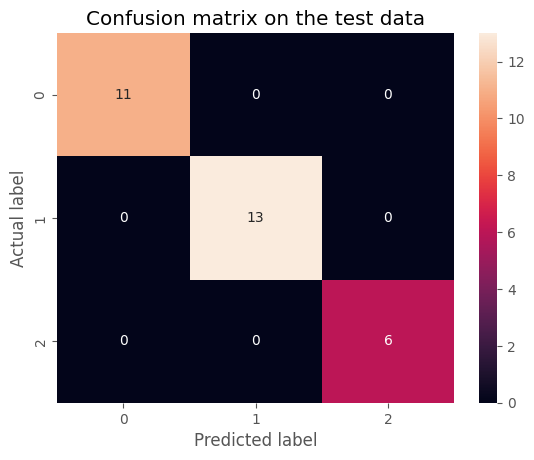

In [20]:
# Confusion matrix test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_test = confusion_matrix(y_test_class, y_pred_MLP_class)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title('Confusion matrix on the test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()